In [5]:
### Sourya Dey, USC
### Comparing sparse and dense matrices in Pytorch
### Pytorch uses Sparse COO format
### Multiplication time is used as metric

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
## Both size and density varying ##
sizes = [2**i for i in range(2,14)]
densetimes = np.zeros_like(sizes, dtype=float)
sptimes = np.zeros_like(sizes, dtype=float)
for i,size in enumerate(sizes):
    spmat = torch.sparse_coo_tensor(indices = torch.tensor([torch.arange(size).tolist(),torch.arange(size).tolist()]), values = torch.randn(size), size=[size,size], dtype=torch.float32)
    densemat = spmat.to_dense()
    multmat = torch.randn(size,size)
    print('Multiplying matrices of size = {0}x{1}'.format(size,size))
    print('Dense multiplication:')
    densetime = %timeit -o torch.mm(densemat,multmat)
    densetimes[i] = np.mean(densetime.timings)*(10**3)
    print('Sparse multiplication:')
    sptime = %timeit -o torch.sparse.mm(spmat,multmat)
    sptimes[i] = np.mean(sptime.timings)*(10**3)
    print()

Multiplying matrices of size = 4x4
Dense multiplication:
4.76 µs ± 36.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Sparse multiplication:
9.63 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Multiplying matrices of size = 8x8
Dense multiplication:
4.76 µs ± 51.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Sparse multiplication:
9.56 µs ± 37.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Multiplying matrices of size = 16x16
Dense multiplication:
4.48 µs ± 37.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Sparse multiplication:
9.6 µs ± 33.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Multiplying matrices of size = 32x32
Dense multiplication:
5.42 µs ± 83.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Sparse multiplication:
10 µs ± 61.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Multiplying matrices of size = 64x64
Dense multiplication:
9.74 µs ± 97.7 ns

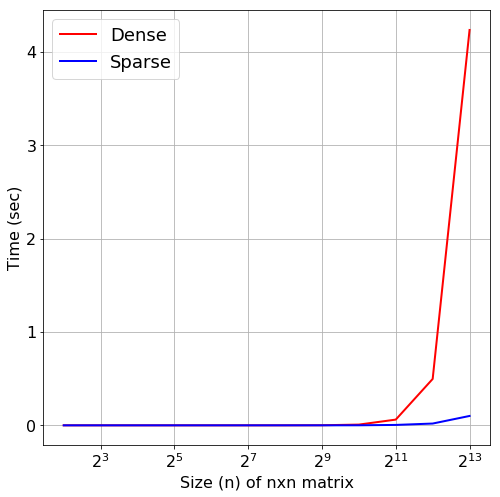

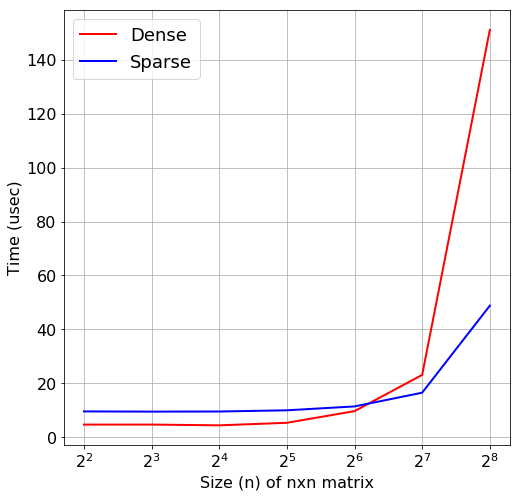

In [9]:
plt.figure(figsize = (8,8))
plt.semilogx(sizes, densetimes/1000, basex=2, color='r', linewidth=2, label='Dense')
plt.semilogx(sizes, sptimes/1000, basex=2, color='b', linewidth=2, label='Sparse')
plt.xlabel('Size (n) of nxn matrix', fontsize=16)
plt.ylabel('Time (sec)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize = 18)
plt.savefig('bothvarying', bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure(figsize = (8,8))
plt.semilogx(sizes[:7], densetimes[:7]*1000, basex=2, color='r', linewidth=2, label='Dense')
plt.semilogx(sizes[:7], sptimes[:7]*1000, basex=2, color='b', linewidth=2, label='Sparse')
plt.xlabel('Size (n) of nxn matrix', fontsize=16)
plt.ylabel('Time (usec)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize = 18)
plt.savefig('bothvarying_closeup', bbox_inches='tight', pad_inches=0)
plt.show()

In [2]:
## Density fixed, size varying ##
sizes = [2**i for i in range(2,14)]
densetimes = np.zeros_like(sizes, dtype=float)
sptimes = np.zeros_like(sizes, dtype=float)
for i,size in enumerate(sizes):
    nnz = size*size//8
    spmat = torch.sparse_coo_tensor(indices = torch.tensor([torch.randint(size,(nnz,)).tolist(),torch.randint(size,(nnz,)).tolist()]), values = torch.randn(nnz), size=[size,size], dtype=torch.float32)
    densemat = spmat.to_dense()
    multmat = torch.randn(size,size)
    print('Multiplying matrices of size = {0}x{1}'.format(size,size))
    print('Dense multiplication:')
    densetime = %timeit -o torch.mm(densemat,multmat)
    densetimes[i] = np.mean(densetime.timings)*(10**3)
    print('Sparse multiplication:')
    sptime = %timeit -o torch.sparse.mm(spmat,multmat)
    sptimes[i] = np.mean(sptime.timings)*(10**3)
    print()

Multiplying matrices of size = 4x4
Dense multiplication:
4.79 µs ± 77.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Sparse multiplication:
9.46 µs ± 59.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Multiplying matrices of size = 8x8
Dense multiplication:
4.77 µs ± 59.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Sparse multiplication:
9.75 µs ± 57.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Multiplying matrices of size = 16x16
Dense multiplication:
4.52 µs ± 24.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Sparse multiplication:
9.96 µs ± 86.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Multiplying matrices of size = 32x32
Dense multiplication:
5.46 µs ± 45.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Sparse multiplication:
12.4 µs ± 69.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Multiplying matrices of size = 64x64
Dense multiplication:
9.93 µs ± 277

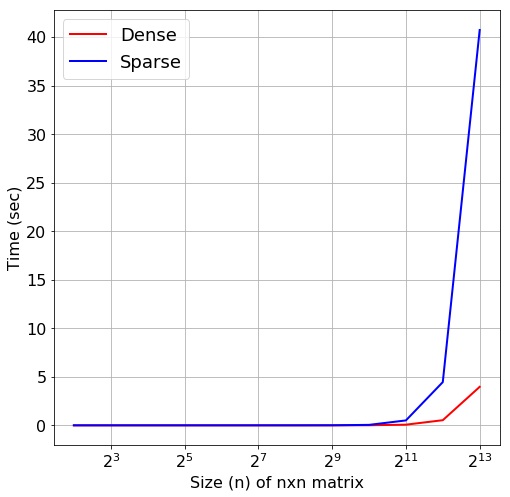

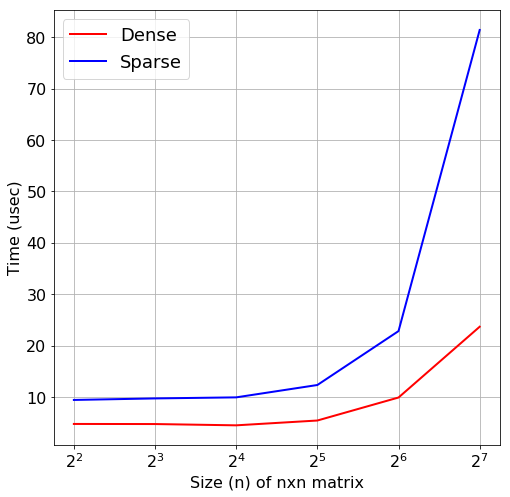

In [7]:
plt.figure(figsize = (8,8))
plt.semilogx(sizes, densetimes/1000, basex=2, color='r', linewidth=2, label='Dense')
plt.semilogx(sizes, sptimes/1000, basex=2, color='b', linewidth=2, label='Sparse')
plt.xlabel('Size (n) of nxn matrix', fontsize=16)
plt.ylabel('Time (sec)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize = 18)
plt.savefig('fixeddensity_12p5', bbox_inches='tight', pad_inches=0)
plt.show()

plt.figure(figsize = (8,8))
plt.semilogx(sizes[:6], densetimes[:6]*1000, basex=2, color='r', linewidth=2, label='Dense')
plt.semilogx(sizes[:6], sptimes[:6]*1000, basex=2, color='b', linewidth=2, label='Sparse')
plt.xlabel('Size (n) of nxn matrix', fontsize=16)
plt.ylabel('Time (usec)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize = 18)
plt.savefig('fixeddensity_12p5_closeup', bbox_inches='tight', pad_inches=0)
plt.show()

In [12]:
## Size fixed at 16, density varying ##
size = 16
nnzs = [2**i for i in range(9)]
times = np.zeros_like(nnzs, dtype=float)
multmat = torch.randn(size,size)
for i,nnz in enumerate(nnzs):
    spmat = torch.sparse_coo_tensor(indices = torch.tensor([torch.randint(size,(nnz,)).tolist(),torch.randint(size,(nnz,)).tolist()]), values = torch.randn(nnz), size=[size,size], dtype=torch.float32)
    print('Density = {0}%'.format(nnz*100/(size*size)))
    time = %timeit -o torch.sparse.mm(spmat,multmat)
    times[i] = np.mean(time.timings)*(10**6)
    print()

Density = 0.390625%
9.7 µs ± 72.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 0.78125%
9.86 µs ± 62.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 1.5625%
9.92 µs ± 63.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 3.125%
10.2 µs ± 306 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 6.25%
10.3 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 12.5%
10.5 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 25.0%
11.3 µs ± 70.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 50.0%
12.7 µs ± 35.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 100.0%
15.5 µs ± 65.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)



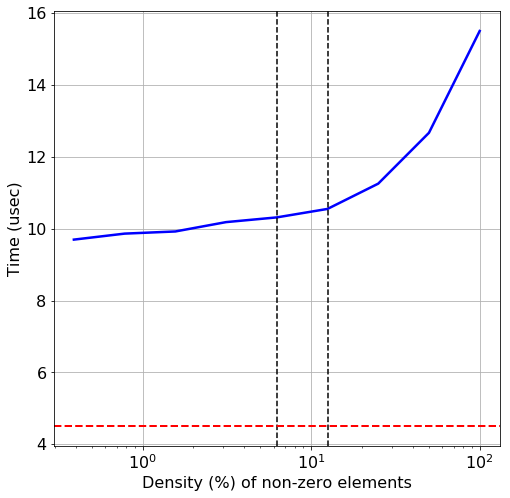

In [13]:
plt.figure(figsize = (8,8))
plt.semilogx(np.array(nnzs)*100/(size*size), times, color='b', linewidth=2.5)
plt.xlabel('Density (%) of non-zero elements', fontsize=16)
plt.ylabel('Time (usec)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(6.25, linestyle='--', linewidth=1.5, color='k')
plt.axvline(12.5, linestyle='--', linewidth=1.5, color='k')
plt.axhline(4.5, linestyle='--', linewidth=2, color='r')
plt.grid()
plt.savefig('timevsdensity_size16', bbox_inches='tight', pad_inches=0)
plt.show()

In [19]:
## Size fixed at 128, density varying ##
size = 128
nnzs = [2**i for i in range(15)]
times = np.zeros_like(nnzs, dtype=float)
multmat = torch.randn(size,size)
for i,nnz in enumerate(nnzs):
    spmat = torch.sparse_coo_tensor(indices = torch.tensor([torch.randint(size,(nnz,)).tolist(),torch.randint(size,(nnz,)).tolist()]), values = torch.randn(nnz), size=[size,size], dtype=torch.float32)
    print('Density = {0}%'.format(nnz*100/(size*size)))
    time = %timeit -o torch.sparse.mm(spmat,multmat)
    times[i] = np.mean(time.timings)*(10**3)
    print()

Density = 0.006103515625%
11.5 µs ± 50.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 0.01220703125%
11.8 µs ± 236 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 0.0244140625%
11.7 µs ± 66.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 0.048828125%
11.9 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 0.09765625%
12.2 µs ± 84.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 0.1953125%
12.9 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 0.390625%
14.1 µs ± 74.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 0.78125%
17 µs ± 265 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Density = 1.5625%
20.9 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Density = 3.125%
29.8 µs ± 390 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Density = 6.25%
48 µs ± 929 ns per 

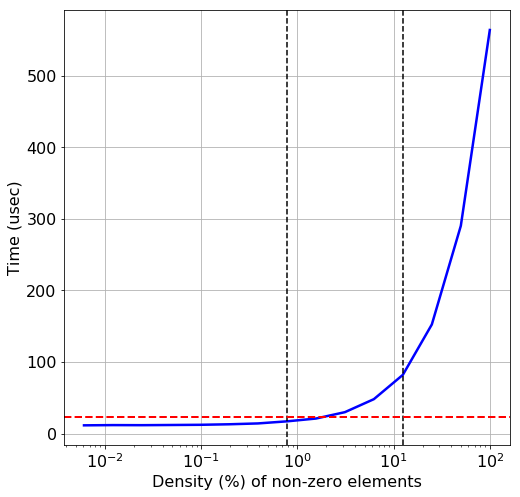

In [20]:
plt.figure(figsize = (8,8))
plt.semilogx(np.array(nnzs)*100/(size*size), times*1000, color='b', linewidth=2.5)
plt.xlabel('Density (%) of non-zero elements', fontsize=16)
plt.ylabel('Time (usec)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(0.78125, linestyle='--', linewidth=1.5, color='k')
plt.axvline(12.5, linestyle='--', linewidth=1.5, color='k')
plt.axhline(23.45, linestyle='--', linewidth=2, color='r')
plt.grid()
plt.savefig('timevsdensity_size128', bbox_inches='tight', pad_inches=0)
plt.show()

In [14]:
## Size fixed at 1024, density varying ##
size = 1024
nnzs = [2**i for i in range(21)]
times = np.zeros_like(nnzs, dtype=float)
multmat = torch.randn(size,size)
for i,nnz in enumerate(nnzs):
    spmat = torch.sparse_coo_tensor(indices = torch.tensor([torch.randint(size,(nnz,)).tolist(),torch.randint(size,(nnz,)).tolist()]), values = torch.randn(nnz), size=[size,size], dtype=torch.float32)
    print('Density = {0}%'.format(nnz*100/(size*size)))
    time = %timeit -o torch.sparse.mm(spmat,multmat)
    times[i] = np.mean(time.timings)*(10**3)
    print()

Density = 9.5367431640625e-05%
486 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Density = 0.00019073486328125%
465 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Density = 0.0003814697265625%
486 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Density = 0.000762939453125%
474 µs ± 5.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Density = 0.00152587890625%
496 µs ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Density = 0.0030517578125%
490 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Density = 0.006103515625%
488 µs ± 6.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Density = 0.01220703125%
510 µs ± 6.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Density = 0.0244140625%
570 µs ± 8.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Density = 0.048828125%
658 µs ± 6.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

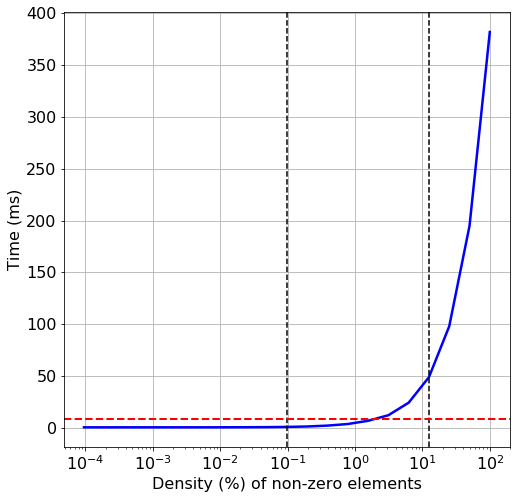

In [18]:
plt.figure(figsize = (8,8))
plt.semilogx(np.array(nnzs)*100/(size*size), times, color='b', linewidth=2.5)
plt.xlabel('Density (%) of non-zero elements', fontsize=16)
plt.ylabel('Time (ms)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(0.0976, linestyle='--', linewidth=1.5, color='k')
plt.axvline(12.5, linestyle='--', linewidth=1.5, color='k')
plt.axhline(8.33, linestyle='--', linewidth=2, color='r')
plt.grid()
plt.savefig('timevsdensity_size1024', bbox_inches='tight', pad_inches=0)
plt.show()

In [8]:
## Size fixed at 8192, density varying ##
size = 8192
nnzs = [2**i for i in range(27)]
times = np.zeros_like(nnzs, dtype=float)
multmat = torch.randn(size,size)
for i,nnz in enumerate(nnzs):
    spmat = torch.sparse_coo_tensor(indices = torch.tensor([torch.randint(size,(nnz,)).tolist(),torch.randint(size,(nnz,)).tolist()]), values = torch.randn(nnz), size=[size,size], dtype=torch.float32)
    print('Density = {0}%'.format(nnz*100/(size*size)))
    time = %timeit -o torch.sparse.mm(spmat,multmat)
    times[i] = np.mean(time.timings)
    print()

Density = 1.4901161193847656e-06%
61.2 ms ± 4.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Density = 2.9802322387695312e-06%
62.9 ms ± 4.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Density = 5.9604644775390625e-06%
60.7 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Density = 1.1920928955078125e-05%
66.9 ms ± 4.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Density = 2.384185791015625e-05%
61.4 ms ± 3.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Density = 4.76837158203125e-05%
61.9 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Density = 9.5367431640625e-05%
64.3 ms ± 6.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Density = 0.00019073486328125%
60.6 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Density = 0.0003814697265625%
62 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Density = 0.000762939453125%
58.5 ms ± 338 µs per loop (mean ± st

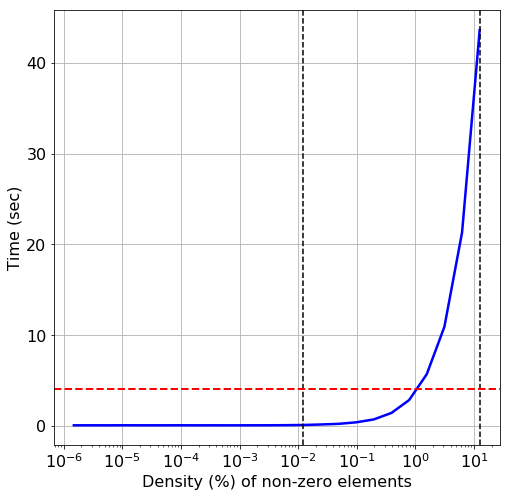

In [11]:
plt.figure(figsize = (8,8))
plt.semilogx(np.array(nnzs[:-3])*100/(size*size), times[:-3], color='b', linewidth=2.5)
plt.xlabel('Density (%) of non-zero elements', fontsize=16)
plt.ylabel('Time (sec)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(0.01221, linestyle='--', linewidth=1.5, color='k')
plt.axvline(12.5, linestyle='--', linewidth=1.5, color='k')
plt.axhline(4.1, linestyle='--', linewidth=2, color='r')
plt.grid()
plt.savefig('timevsdensity_size8192', bbox_inches='tight', pad_inches=0)
plt.show()